<a href="https://colab.research.google.com/github/MuhammadUsmanTahir10/LungCancerPrediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lung Cancer Prediction using Machine Learning**

**Introduction:**

This study focuses on early stage lung cancer detection. Genetic K-Nearest Neighbour (GKNN) Algorithm is proposed for the detection which is a non parametric method. This optimization algorithm allows physicians to identify the nodules present in the CT lung images in the early stage hence the lung cancer. Since the manual interpretation of the lung cancer CT images are time consuming and very critical, to overcome this difficulty the Genetic Algorithm method is combined with K-Nearest Neighbour (K-NN) algorithm which would classify the cancer images quickly and effectively.

The performance measures like the classification rate and the false positive rates are analyzed. In traditional K-NN algorithm, initially the distance between all the test and training samples are calculated and K-neighbours with greater distances are taken for classification. In this proposed method, by using Genetic Algorithm, K (50-100) numbers of samples are chosen for each iteration and the classification accuracy of 90% is achieved as fitness. The highest accuracy is recorded each time.

**Models to be used:**

Support Vector Machine

Random Forest Classifier

KNeighborsClassifier

Ann

Voting Classifier

Stacking Classifier

Logistic Regression

Decision Tree

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Importing Dataset and EDA:**

In [3]:
#Importing Dataset

dataset = pd.read_csv("/content/drive/MyDrive/survey_lung_cancer.csv")

In [4]:
#EDA (Exploring data analysis)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
#There are no null values

dataset.shape

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [7]:
dataset.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


**Data Visualization:**

In [8]:
hist_data = [dataset["AGE"].values]
group_labels = ['AGE']
ax = ff.create_distplot(hist_data, group_labels)
ax.show()

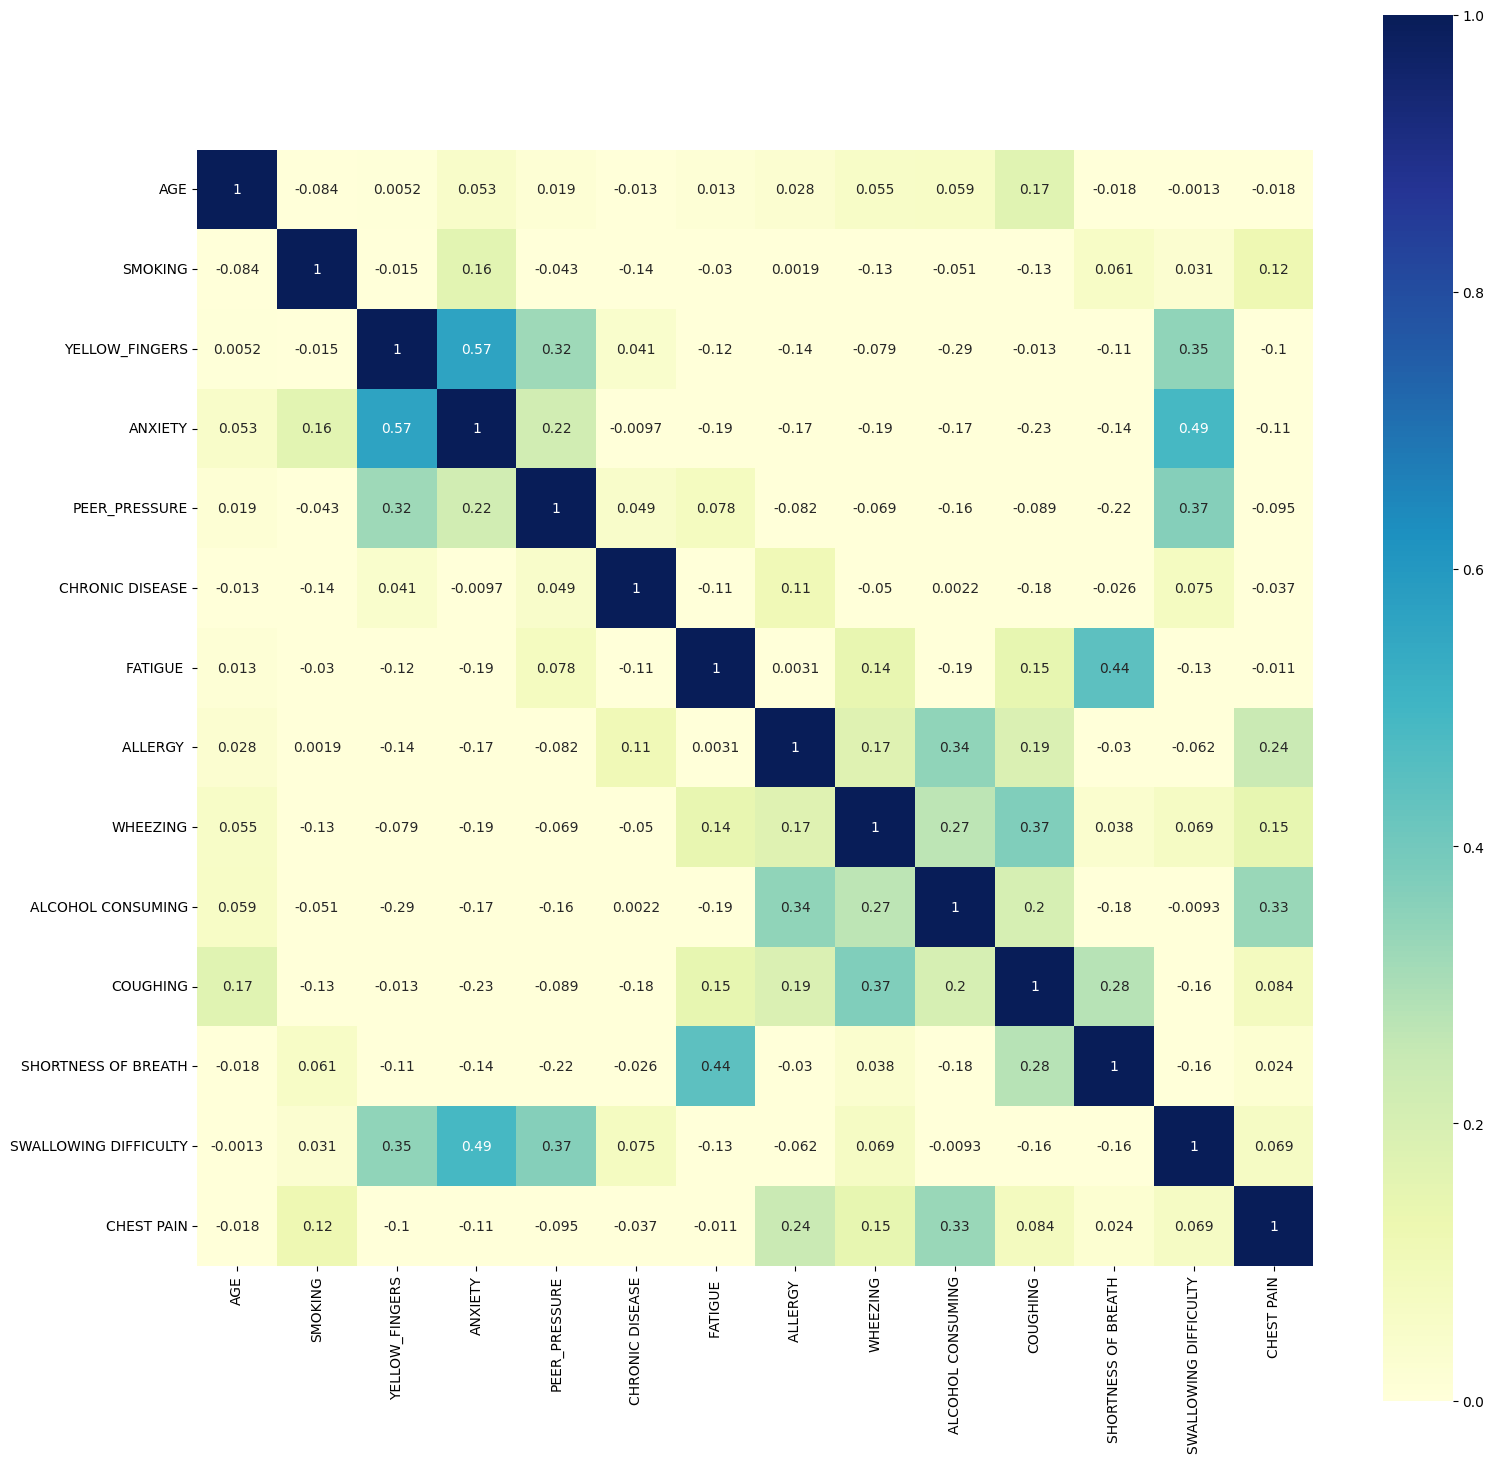

In [10]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

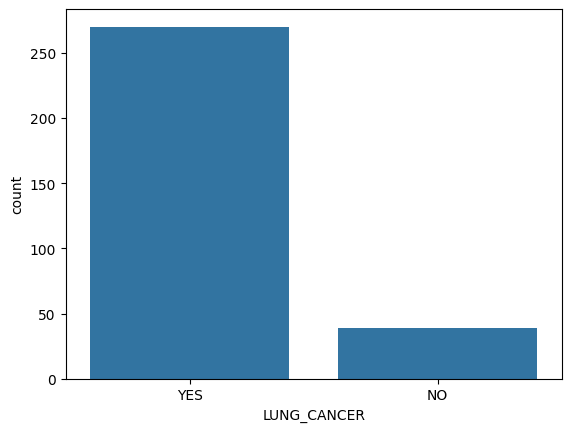

In [11]:
sns.countplot(x = 'LUNG_CANCER', data = dataset)

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

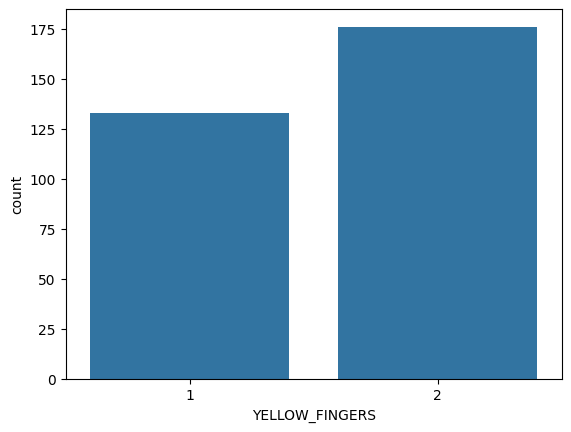

In [12]:
sns.countplot(x = 'YELLOW_FINGERS', data = dataset)

In [13]:
dataset['ANXIETY'].unique()

array([2, 1])

In [14]:
dataset['PEER_PRESSURE'].unique()

array([1, 2])

<Axes: xlabel='CHRONIC DISEASE', ylabel='count'>

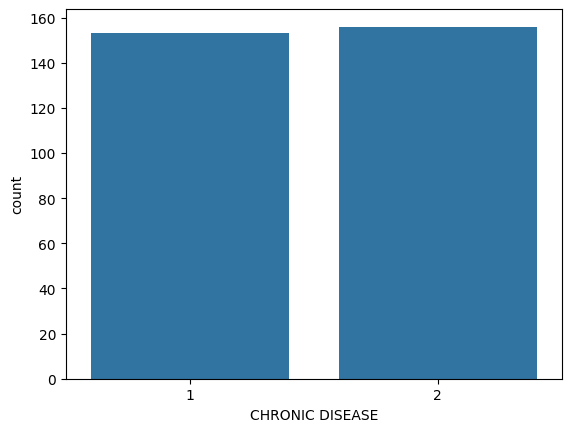

In [15]:
sns.countplot(x = 'CHRONIC DISEASE',data = dataset)

In [16]:
dataset['YELLOW_FINGERS'].unique()

array([2, 1])

In [18]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [19]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

In [20]:
dataset['GENDER']

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

In [21]:
dataset['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [22]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [23]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


In [24]:
X = dataset.drop(['AGE', 'GENDER', 'SHORTNESS OF BREATH', 'SMOKING', 'LUNG_CANCER'], axis=1)

In [25]:
X

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,1,1,2,1,2,2,2,2,2
1,1,1,1,2,2,2,1,1,1,2,2
2,1,1,2,1,2,1,2,1,2,1,2
3,2,2,1,1,1,1,1,2,1,2,2
4,2,1,1,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,1,1,2,2,2,1
305,1,1,1,1,2,2,2,2,2,1,2
306,1,1,1,1,1,2,2,2,2,1,2
307,1,2,1,1,2,2,1,2,2,1,2


In [26]:
y = dataset['LUNG_CANCER']

In [27]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Support Vector Machine

Random Forest Classifier

KNeighborsClassifier

ANN

Voting Classifier

Stacking Classifier

Logistic Regression

Decision Tree

**Support Vector Machine**

In [29]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  96.7741935483871 

*Confusion Matrix for SVM: 
[[ 9  1]
 [ 1 51]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [30]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
svm_result = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm

Accuracy:  0.967741935483871


(0.9, 0.15)

**Random Forest Classifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  96.7741935483871 

*Confusion Matrix for RF: 
[[ 9  1]
 [ 1 51]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [32]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.967741935483871


(0.9, 0.15)

**KNeighborsClassifier**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X, y)
predictions = KNN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val3, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  95.16129032258065 

*Confusion Matrix for KNN: 
[[ 8  2]
 [ 1 51]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.96      0.98      0.97        52

    accuracy                           0.95        62
   macro avg       0.93      0.89      0.91        62
weighted avg       0.95      0.95      0.95        62



In [34]:
y_pred_knn = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.9516129032258065


(0.8, 0.13559322033898305)

**ANN**

In [35]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(X, y)
predictions = ANN.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for ANN: ", val4, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_test, predictions))

*Accuracy score for ANN:  93.54838709677419 

*Confusion Matrix for ANN: 
[[ 7  3]
 [ 1 51]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.94      0.98      0.96        52

    accuracy                           0.94        62
   macro avg       0.91      0.84      0.87        62
weighted avg       0.93      0.94      0.93        62



In [36]:
y_pred_ann = ANN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ann)
cm
ann_result = accuracy_score(y_test,y_pred_ann)
print("Accuracy :",ann_result)
recall_ann = cm[0][0]/(cm[0][0] + cm[0][1])
precision_ann = cm[0][0]/(cm[0][0]+cm[1][1])
recall_ann,precision_ann

Accuracy : 0.9354838709677419


(0.7, 0.1206896551724138)

**Voting Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [38]:
clf1 = SVC()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X, y)
predictions = eclf.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  96.7741935483871 

*Confusion Matrix for Voting Classifier: 
[[ 9  1]
 [ 1 51]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [40]:
y_pred_eclf = eclf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_eclf)
cm
eclf_result = accuracy_score(y_test,y_pred_eclf)
print("Accuracy :",eclf_result)
recall_eclf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_eclf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_eclf,precision_eclf

Accuracy : 0.967741935483871


(0.9, 0.15)

**Stacking Classifier**

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

In [42]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [43]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X, y)
predictions = clf.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Stacking Classifier: ", val6, "\n")
print("*Confusion Matrix for Stacking Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Stacking Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Stacking Classifier:  91.93548387096774 

*Confusion Matrix for Stacking Classifier: 
[[ 6  4]
 [ 1 51]]
*Classification Report for Stacking Classifier: 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.93      0.98      0.95        52

    accuracy                           0.92        62
   macro avg       0.89      0.79      0.83        62
weighted avg       0.92      0.92      0.91        62



In [44]:
y_pred_sc = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sc)
cm
sc_result = accuracy_score(y_test,y_pred_sc)
print("Accuracy :",sc_result)
recall_sc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_sc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_sc,precision_sc

Accuracy : 0.9193548387096774


(0.6, 0.10526315789473684)

**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Logistic Regression: ", val7, "\n")
print("*Confusion Matrix for Logistic Regression: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Logistic Regression: ")
print(classification_report(y_test, predictions))

*Accuracy score for Logistic Regression:  91.93548387096774 

*Confusion Matrix for Logistic Regression: 
[[ 6  4]
 [ 1 51]]
*Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.93      0.98      0.95        52

    accuracy                           0.92        62
   macro avg       0.89      0.79      0.83        62
weighted avg       0.92      0.92      0.91        62



In [46]:
y_pred_log = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
cm
log_result = accuracy_score(y_test,y_pred_log)
print("Accuracy :",log_result)
recall_log = cm[0][0]/(cm[0][0] + cm[0][1])
precision_log = cm[0][0]/(cm[0][0]+cm[1][1])
recall_log,precision_log

Accuracy : 0.9193548387096774


(0.6, 0.10526315789473684)

**Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val8, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Decision Tree: ")
print(classification_report(y_test, predictions))

*Accuracy score for Decision Tree:  98.38709677419355 

*Confusion Matrix for Decision Tree: 
[[10  0]
 [ 1 51]]
*Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.98      0.99        52

    accuracy                           0.98        62
   macro avg       0.95      0.99      0.97        62
weighted avg       0.99      0.98      0.98        62



In [48]:
y_pred_dc = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dc)
cm
dc_result = accuracy_score(y_test,y_pred_dc)
print("Accuracy :",dc_result)
recall_dc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dc,precision_dc

Accuracy : 0.9838709677419355


(1.0, 0.16393442622950818)

**Accuracy Comparison**

In [49]:
 score = [val1,val2,val3,val4,val5,val6,val7,val8]
#make variabel for save the result and to show it
classifier = ('SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[96.7741935483871, 96.7741935483871, 95.16129032258065, 93.54838709677419, 96.7741935483871, 91.93548387096774, 91.93548387096774, 98.38709677419355]


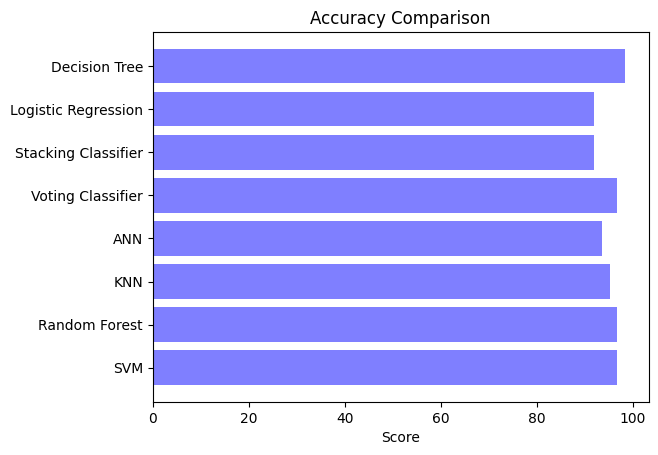

In [50]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [51]:
results ={'Accuracy': [svm_result*100,rf_result*100,knn_result*100,ann_result*100,eclf_result*100,sc_result*100,log_result*100,dc_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_knn*100,recall_ann*100,recall_eclf*100,recall_sc*100,recall_log*100,recall_dc*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_knn*100,precision_ann*100,precision_eclf*100,precision_sc*100,precision_log*100,precision_dc*100]}
index = ['SVM','Random Forest','KNN','ANN','Voting Classifier','Stacking Classifier','Logistic Regression','Decision Tree']

In [52]:
results =pd.DataFrame(results,index=index)

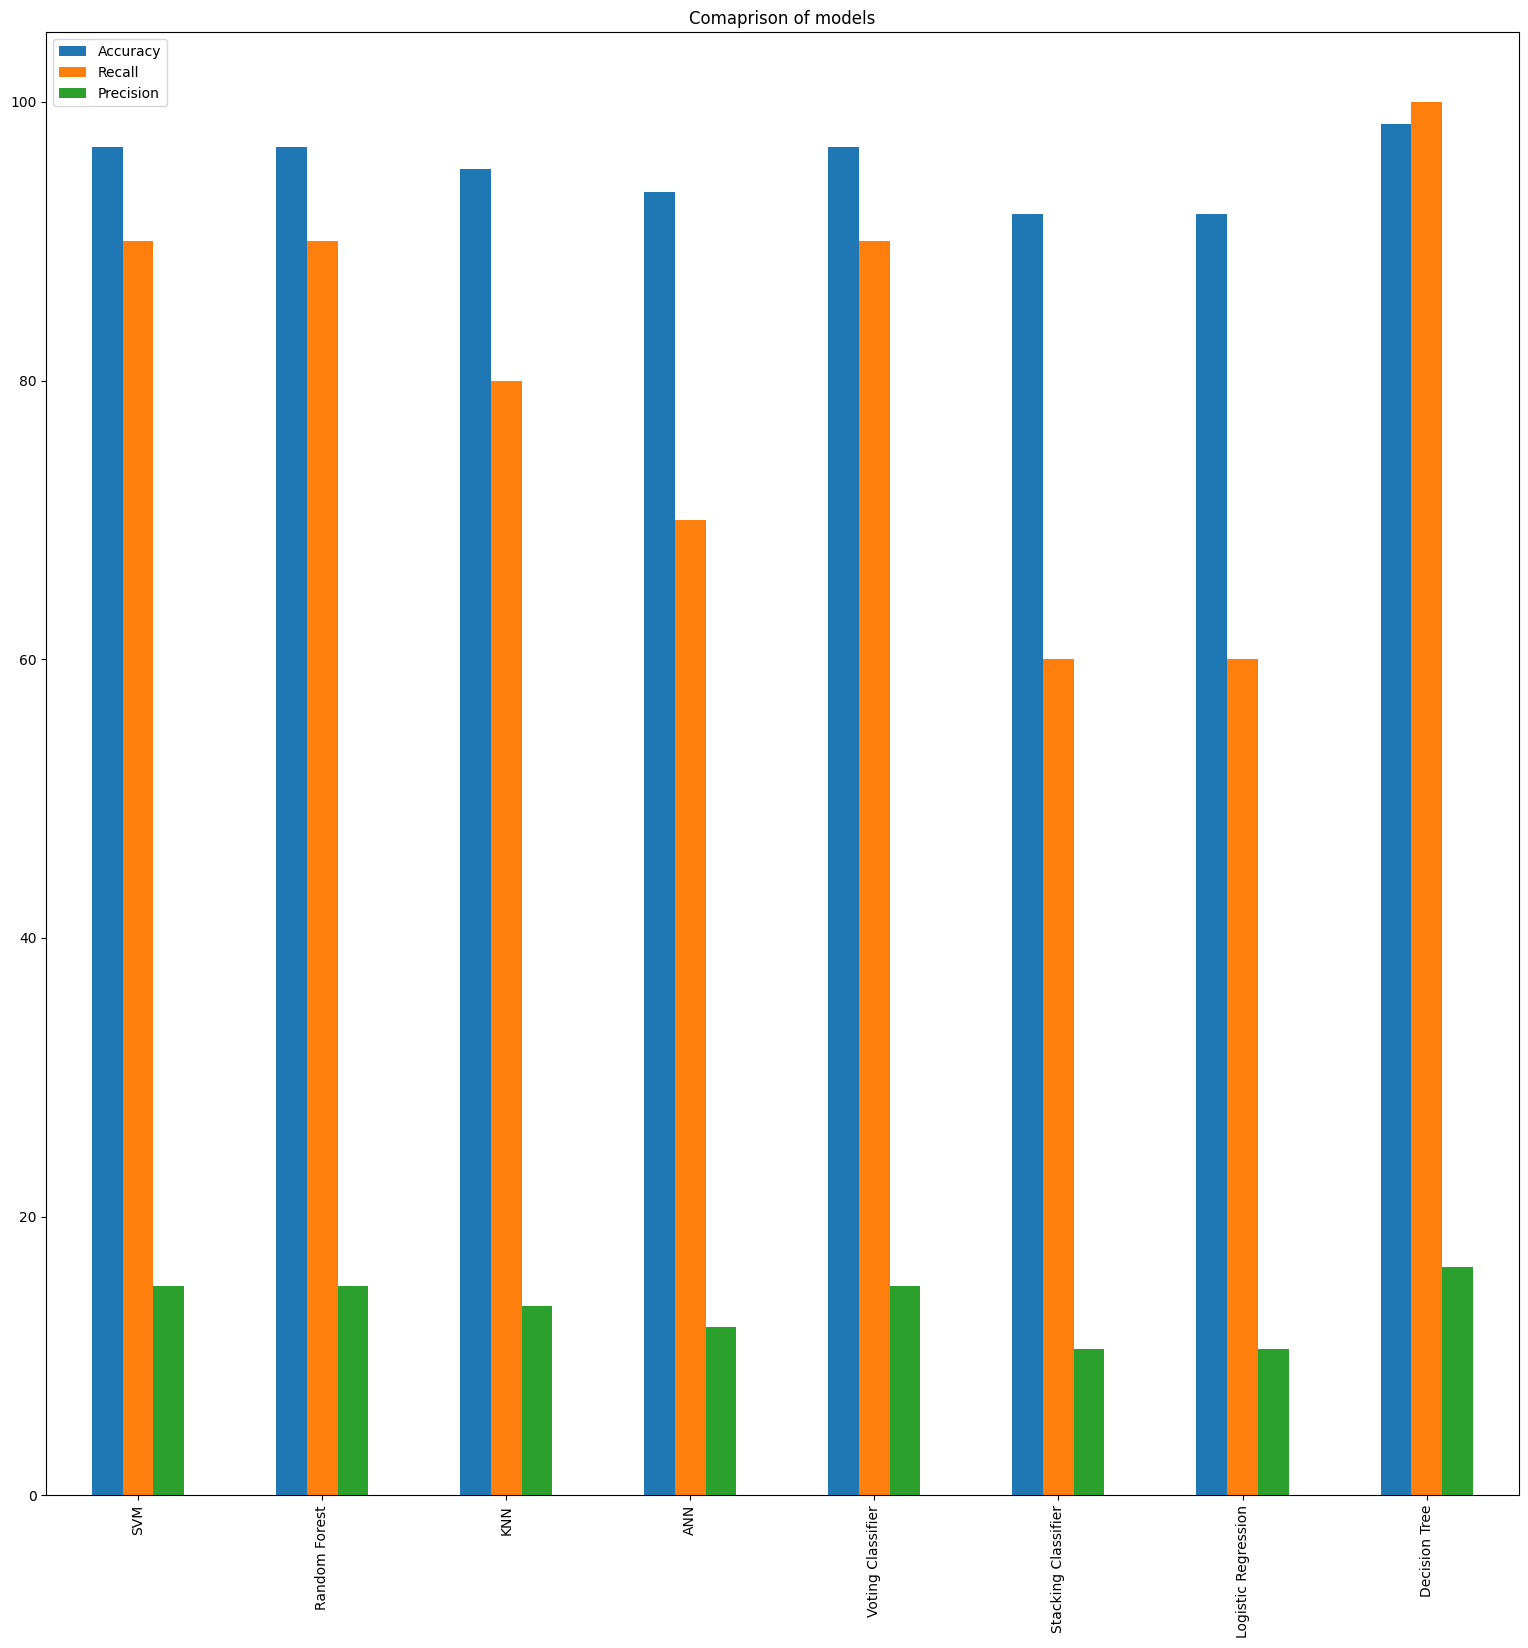

In [53]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('acc.png')